In [ ]:
!pip install -q kaggle

In [ ]:
%mkdir dataset
%mkdir dataset/images # for source images
%mkdir dataset/masks # for annotation masks
%mkdir dataset/test # for test images
%mkdir dataset/temp # temp storage

In [ ]:
#move the zip file to my google drive
#first mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# start the download
!kaggle datasets download 'nikhilpandey360/chest-xray-masks-and-labels'

Dataset URL: https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels
License(s): CC0-1.0
100% 9.57G/9.58G [07:11<00:00, 23.8MB/s]
100% 9.58G/9.58G [07:11<00:00, 23.9MB/s]


In [ ]:
!unzip chest-xray-masks-and-labels.zip -d dataset/temp/

Archive:  chest-xray-masks-and-labels.zip
  inflating: dataset/temp/Lung Segmentation/.ipynb_checkpoints/Montgomery-checkpoint.ipynb  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0001_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0002_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0003_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0004_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0005_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0006_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0007_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0008_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0009_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0010_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0011_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0012_0.png  
 

In [ ]:
%ls dataset/temp/Lung\ Segmentation

ClinicalReadings/  masks/                       NLM-MontgomeryCXRSet-ReadMe.pdf
CXR_png/           NLM-ChinaCXRSet-ReadMe.docx  test/


In [ ]:
%mv dataset/temp/Lung\ Segmentation/CXR_png/* dataset/images/
IMAGE_PATH = "/content/dataset/images/"

In [ ]:
%mv dataset/temp/Lung\ Segmentation/masks/* dataset/masks/
MASK_PATH = '/content/dataset/masks/'

In [ ]:
%mv dataset/temp/Lung\ Segmentation/test/* dataset/test/
TEST_PATH = '/content/dataset/test/'

In [ ]:
# remove the original zip file
%rm chest-xray-masks-and-labels.zip

In [ ]:
# clean-up
%rm -r dataset/temp/

In [ ]:
#HARMONIZE THE DATASET

In [ ]:
# importing os module
import os

# suffix cropping function
def rchop(s, suffix):
    if suffix and s.endswith(suffix):
        return s[:-len(suffix)]
    return s

suffix = "_mask.png"

# iterate over all mask images and edit the file-names
for count, filename in enumerate(os.listdir("/content/dataset/masks")):
  src = "/content/dataset/masks/" + filename
  res = rchop(src, suffix)
  dst = ""
  if src != res:
    dst = rchop(src, suffix) + ".png"
    os.rename(src, dst)

In [ ]:
# check the number of files in the images/ and masks/ directories
import os.path

print("number of files in images/ directory: " + str(len([name for name in os.listdir("/content/dataset/images/")])))
print("number of files in masks/ directory: " + str(len([name for name in os.listdir("/content/dataset/masks/")])))


number of files in images/ directory: 800
number of files in masks/ directory: 704


In [ ]:
# function to confirm the existence of a file in a given directory
def searchFile(fileName, TARGET_PATH):
  for root, dirs, files in os.walk(TARGET_PATH):
    for Files in files:
      #print(Files)
      found = Files.find(fileName)
      if found != -1:
        break
  return found

In [ ]:
%mkdir /content/dataset/orphan_images

In [ ]:
# clean up the images/ directory by removing all images that do not have a mask
import shutil

cnt = 0

for count, filename in enumerate(os.listdir("/content/dataset/images")):
  found = searchFile(filename, MASK_PATH)
  if found == -1:
    cnt = cnt + 1
    src = "/content/dataset/images/" + filename
    dst = "/content/dataset/orphan_images/" + filename
    dest = shutil.move(src, dst)
print("number of files not matched: " + str(cnt))

number of files not matched: 96


In [ ]:
# confirm consistency
print("number of files in images/ directory: " + str(len([name for name in os.listdir("/content/dataset/images/")])))
print("number of files in masks/ directory: " + str(len([name for name in os.listdir("/content/dataset/masks/")])))

number of files in images/ directory: 704
number of files in masks/ directory: 704


In [ ]:
import os
import shutil
import random

# Assuming the previous code has already been executed, and the following directories are set up:
IMAGE_PATH = '/content/dataset/images/'
MASK_PATH = '/content/dataset/masks/'
TEST_PATH = '/content/dataset/test/'

# Create the test directory if it doesn't exist
os.makedirs(TEST_PATH, exist_ok=True)

# Get all image filenames
all_images = sorted([f for f in os.listdir(IMAGE_PATH) if f.endswith('.png')])

# Calculate 10% for the test split
num_test = int(len(all_images) * 0.1)

# Randomly select 10% of the dataset for testing
test_indices = random.sample(range(len(all_images)), num_test)

# Move selected images to the test directory
for idx in test_indices:
    src = os.path.join(IMAGE_PATH, all_images[idx])
    dst = os.path.join(TEST_PATH, all_images[idx])
    shutil.move(src, dst)

print(f"Moved {num_test} images to the test directory: {TEST_PATH}")

# Check the number of files in the test directory
print("Number of files in the test directory: " + str(len(os.listdir(TEST_PATH))))

Moved 70 images to the test directory: /content/dataset/test/
Number of files in the test directory: 166


In [ ]:
# Create the test_masks directory if it doesn't exist
TEST_MASKS_PATH = '/content/dataset/test_masks/'
os.makedirs(TEST_MASKS_PATH, exist_ok=True)

# Move corresponding masks to the test_masks directory
for idx in test_indices:
    # Get the filename of the image that was moved
    image_filename = all_images[idx]

    # The mask filename is the same as the image filename
    mask_filename = image_filename  # No changes needed to the filename
    src_mask = os.path.join(MASK_PATH, mask_filename)

    # Print debug information
    print(f"Checking for mask: {mask_filename}")
    print(f"Source mask path: {src_mask}")

    # Check if the corresponding mask exists before moving
    if os.path.exists(src_mask):
        dst_mask = os.path.join(TEST_MASKS_PATH, mask_filename)
        shutil.move(src_mask, dst_mask)
    else:
        print(f"Mask not found for image: {image_filename}")

# Check the number of files in the test_masks directory
print("Number of masks in the test_masks directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Checking for mask: MCUCXR_0057_0.png
Source mask path: /content/dataset/masks/MCUCXR_0057_0.png
Checking for mask: CHNCXR_0374_1.png
Source mask path: /content/dataset/masks/CHNCXR_0374_1.png
Checking for mask: CHNCXR_0324_0.png
Source mask path: /content/dataset/masks/CHNCXR_0324_0.png
Checking for mask: CHNCXR_0221_0.png
Source mask path: /content/dataset/masks/CHNCXR_0221_0.png
Checking for mask: MCUCXR_0253_1.png
Source mask path: /content/dataset/masks/MCUCXR_0253_1.png
Checking for mask: CHNCXR_0392_1.png
Source mask path: /content/dataset/masks/CHNCXR_0392_1.png
Checking for mask: CHNCXR_0228_0.png
Source mask path: /content/dataset/masks/CHNCXR_0228_0.png
Checking for mask: MCUCXR_0091_0.png
Source mask path: /content/dataset/masks/MCUCXR_0091_0.png
Checking for mask: CHNCXR_0420_1.png
Source mask path: /content/dataset/masks/CHNCXR_0420_1.png
Checking for mask: MCUCXR_0086_0.png
Source mask path: /content/dataset/masks/MCUCXR_0086_0.png
Checking for mask: CHNCXR_0269_0.png
Sou

In [ ]:
TEST_PATH = "/content/dataset/test"
TEST_MASKS_PATH = "/content/dataset/test_masks"
TRAIN_PATH = IMAGE_PATH
TRAIN_MASKS_PATH = MASK_PATH

In [ ]:
print("Number of files in the mask directory: " + str(len(os.listdir(MASK_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(IMAGE_PATH))))
print("Number of files in the test_image directory: " + str(len(os.listdir(TEST_PATH))))
print("Number of files in the test_mask directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Number of files in the mask directory: 634
Number of files in the train_image directory: 634
Number of files in the test_image directory: 166
Number of files in the test_mask directory: 70


In [ ]:
import os
import shutil

# Define paths
TEST_IMAGE_PATH = "/content/dataset/test"
ORPHAN_IMAGE_PATH = "/content/dataset/orphan_images"

# Get lists of all images and masks
orpha_images = sorted([f for f in os.listdir(ORPHAN_IMAGE_PATH) if f.endswith('.png')])
test_images = sorted([f for f in os.listdir(TEST_IMAGE_PATH) if f.endswith('.png')])


# Iterate through test images and delete those in train images
for img_path in orpha_images:
    if img_path in test_images:
        full_test_path = os.path.join(TEST_IMAGE_PATH, img_path)
        print(f"Deleting image in test directory: {full_test_path}")
        os.remove(full_test_path)

Deleting image in test directory: /content/dataset/test/CHNCXR_0025_0.png
Deleting image in test directory: /content/dataset/test/CHNCXR_0036_0.png
Deleting image in test directory: /content/dataset/test/CHNCXR_0037_0.png
Deleting image in test directory: /content/dataset/test/CHNCXR_0038_0.png
Deleting image in test directory: /content/dataset/test/CHNCXR_0039_0.png
Deleting image in test directory: /content/dataset/test/CHNCXR_0040_0.png
Deleting image in test directory: /content/dataset/test/CHNCXR_0065_0.png
Deleting image in test directory: /content/dataset/test/CHNCXR_0181_0.png
Deleting image in test directory: /content/dataset/test/CHNCXR_0182_0.png
Deleting image in test directory: /content/dataset/test/CHNCXR_0183_0.png
Deleting image in test directory: /content/dataset/test/CHNCXR_0184_0.png
Deleting image in test directory: /content/dataset/test/CHNCXR_0185_0.png
Deleting image in test directory: /content/dataset/test/CHNCXR_0186_0.png
Deleting image in test directory: /con

In [ ]:
# Function to count the number of files in a directory
def count_files(directory):
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Count files in all paths
train_count = count_files(IMAGE_PATH)
train_masks_count = count_files(MASK_PATH)
test_count = count_files(TEST_PATH)
test_masks_count = count_files(TEST_MASKS_PATH)
orphan_image_count= count_files('/content/dataset/orphan_images')
# Print the results
print(f"Train images: {train_count}")
print(f"Train masks: {train_masks_count}")
print(f"Test images: {test_count}")
print(f"Test masks: {test_masks_count}")
print(f"Orphan images: {orphan_image_count}")

Train images: 634
Train masks: 634
Test images: 70
Test masks: 70
Orphan images: 96


**BUILDING THE UNET MODEL**

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)


    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(input, skip_features, num_filters):  #Takes the previous feature map and builds the segmentation mask
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #bridge between the encoderblock and the decoder block

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="U-Net")
    return model

input_shape = (512, 512, 3)
model = build_unet(input_shape)
model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 512, 512, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 512, 512, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 512, 512, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 512, 512, 64)   │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 512, 512, 64)   │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 512, 512, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 256, 256, 64)   │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 256, 256, 128)  │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 256, 256, 128)  │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 128)  │        147,584 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 256, 256, 128)  │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 256, 256, 128)  │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 128, 128, 128)  │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 256)  │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

print("Model compiled!")

Model compiled!


In [ ]:
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf

# Path to images and masks directories
IMAGE_PATH = "/content/dataset/images"
MASK_PATH = "/content/dataset/masks"

# Function to load images and masks
def load_data(split=0.1):
    images = sorted(glob(os.path.join(IMAGE_PATH, "*.png")))
    masks = sorted(glob(os.path.join(MASK_PATH, "*.png")))

    # Ensure same number of images and masks
    assert len(images) == len(masks), "Number of images and masks do not match"

    # Pair images with corresponding masks
    data = list(zip(images, masks))

    # Split into training and validation sets
    train_data, valid_data = train_test_split(data, test_size=split, random_state=42)

    train_x, train_y = zip(*train_data)
    valid_x, valid_y = zip(*valid_data)

    return (list(train_x), list(train_y)), (list(valid_x), list(valid_y))


def read_image(path):
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (512, 512))  # Resize image to match input shape of U-Net model
    x = x / 255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (512, 512))  # Resize mask to match input shape of U-Net model
    x = x / 255.0  # Normalize mask to [0, 1]
    x = np.expand_dims(x, axis=-1)  # Expand dimensions to match U-Net's expected input shape
    return x


def tf_parse(image_path, mask_path):
    def f(image_path, mask_path):
        image_path = image_path.numpy().decode()  # Convert to NumPy array and decode
        mask_path = mask_path.numpy().decode()  # Convert to NumPy array and decode

        image = tf.io.read_file(image_path)
        image = tf.image.decode_png(image, channels=3)
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)
        image = tf.image.resize(image, [512, 512])

        mask = tf.io.read_file(mask_path)
        mask = tf.image.decode_png(mask, channels=1)
        mask = tf.image.convert_image_dtype(mask, dtype=tf.float32)
        mask = tf.image.resize(mask, [512, 512])

        return image, mask

    image, mask = tf.py_function(f, [image_path, mask_path], [tf.float32, tf.float32])
    image.set_shape([512, 512, 3])
    mask.set_shape([512, 512, 1])
    return image, mask


def augment(image, mask):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)
    return image, mask

def tf_dataset(X, Y, batch=8):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.shuffle(buffer_size=200)
    dataset = dataset.map(tf_parse)
    dataset = dataset.map(augment)  # Add this line
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(4)
    return dataset


**TRAINING THE MODEL**

In [ ]:
def load_test_data():
    test_images = sorted(glob("/content/dataset/test/*.png"))
    return test_images

In [ ]:
#For the OLD MODEL:
from tensorflow.keras.optimizers import Adam

(train_x, train_y), (valid_x, valid_y) = load_data()
print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Valid: {len(valid_x)} - {len(valid_y)}")

# Create TensorFlow datasets
train_dataset = tf_dataset(train_x, train_y, batch=8)
valid_dataset = tf_dataset(valid_x, valid_y, batch=8)

# Build U-Net model
input_shape = (512, 512, 3)

def dice_loss(y_true, y_pred):
    smooth = 1e-15
    y_true = tf.keras.backend.flatten(y_true)
    y_pred = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true * y_pred)
    return 1 - (2 * intersection + smooth) / (tf.keras.backend.sum(y_true) + tf.keras.backend.sum(y_pred) + smooth)

def bce_dice_loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

def dice_coefficient(y_true, y_pred):
    smooth = 1e-15
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth)

Train: 570 - 570
Valid: 64 - 64


**TRAINING**

In [ ]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=25,
    callbacks=[early_stopping,model_checkpoint]
)

Epoch 1/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 451s 4s/step - accuracy: 0.8385 - loss: 0.3808 - val_accuracy: 0.7101 - val_loss: 0.6319
Epoch 2/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.9682 - loss: 0.1202 - val_accuracy: 0.7421 - val_loss: 0.5583
Epoch 3/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.9768 - loss: 0.0908 - val_accuracy: 0.7423 - val_loss: 0.5946
Epoch 4/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.9779 - loss: 0.0829 - val_accuracy: 0.7422 - val_loss: 0.6698
Epoch 5/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.9795 - loss: 0.0754 - val_accuracy: 0.7423 - val_loss: 0.8109
Epoch 6/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.9801 - loss: 0.0711 - val_accuracy: 0.8372 - val_loss: 0.4698
Epoch 7/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.9805 - loss: 0.0674 - val_accuracy: 0.9123 - val_loss: 0.2233
Epoch 8/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.9779 - loss: 0.0717 - val_accuracy: 0.9395 - v

**MODEL METRICS**

In [ ]:
model.save('/content/drive/MyDrive/UNetModels/BestUnet.h5')

In [ ]:
# Load the model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/UNetModels/BestUnet.h5', compile=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


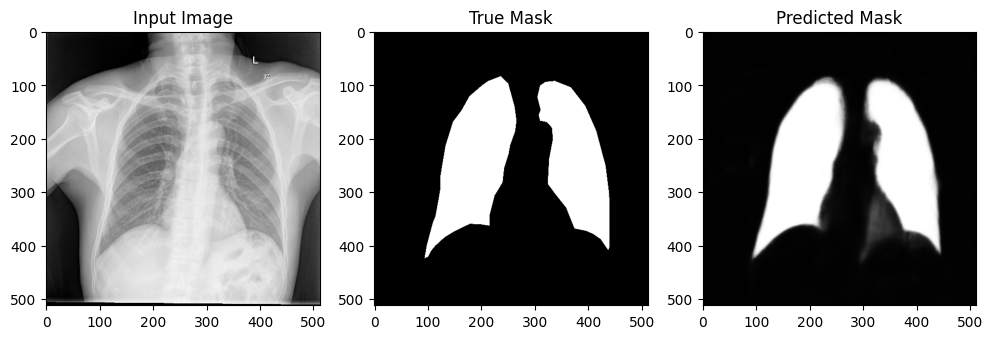

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image shape: (8, 512, 512, 3)
Mask shape: (8, 512, 512, 1)
Prediction shape: (8, 512, 512, 1)
Image data type: <dtype: 'float32'>
Mask data type: <dtype: 'float32'>
Prediction data type: float32
Image value range: [0.0, 1.0]
Mask value range: [0.0, 1.0]
Prediction value range: [0.0003465544432401657, 0.9999728202819824]


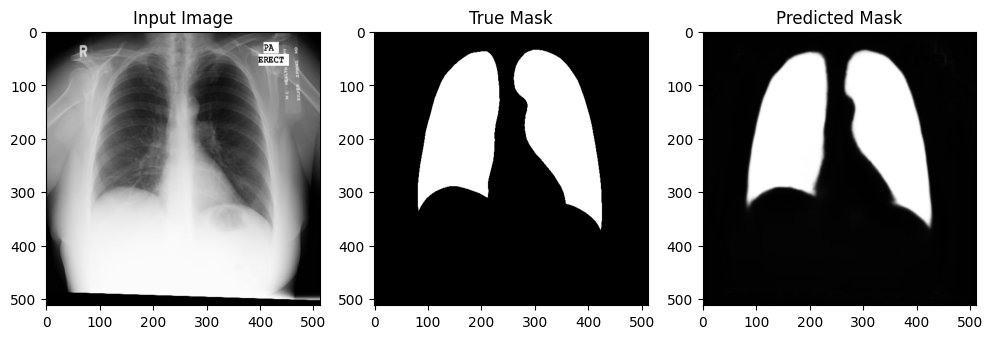

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Image shape: (8, 512, 512, 3)
Mask shape: (8, 512, 512, 1)
Prediction shape: (8, 512, 512, 1)
Image data type: <dtype: 'float32'>
Mask data type: <dtype: 'float32'>
Prediction data type: float32
Image value range: [0.0, 1.0]
Mask value range: [0.0, 1.0]
Prediction value range: [0.00018630213162396103, 0.9999569654464722]


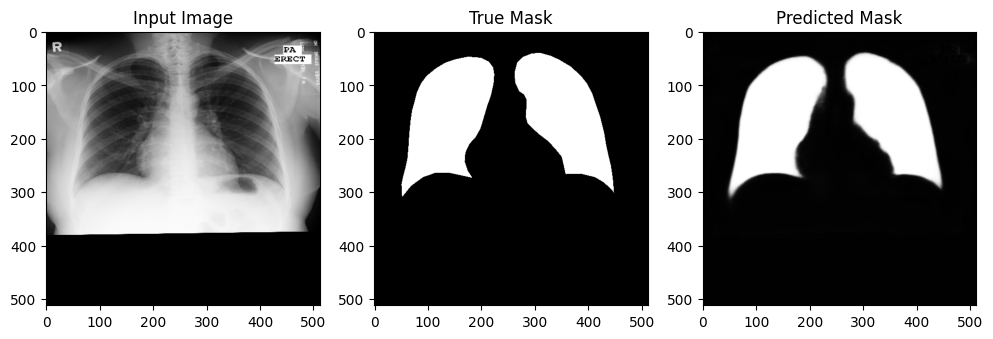

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

def visualize_prediction(image, mask, prediction):
    plt.figure(figsize=(12, 4))

    # Convert tensors to numpy arrays and remove extra dimensions
    image = tf.squeeze(image).numpy()
    mask = tf.squeeze(mask).numpy()
    prediction = tf.squeeze(prediction).numpy()

    plt.subplot(131)
    plt.imshow(image)
    plt.title('Input Image')

    plt.subplot(132)
    plt.imshow(mask, cmap='gray')
    plt.title('True Mask')

    plt.subplot(133)
    plt.imshow(prediction, cmap='gray')
    plt.title('Predicted Mask')

    plt.show()

for image, mask in valid_dataset.take(1):
    prediction = model.predict(image)
    visualize_prediction(image[0], mask[0], prediction[0])

# After training
for image, mask in valid_dataset.take(2):
    prediction = model.predict(image)

    print(f"Image shape: {image.shape}")
    print(f"Mask shape: {mask.shape}")
    print(f"Prediction shape: {prediction.shape}")

    print(f"Image data type: {image.dtype}")
    print(f"Mask data type: {mask.dtype}")
    print(f"Prediction data type: {prediction.dtype}")

    print(f"Image value range: [{tf.reduce_min(image).numpy()}, {tf.reduce_max(image).numpy()}]")
    print(f"Mask value range: [{tf.reduce_min(mask).numpy()}, {tf.reduce_max(mask).numpy()}]")
    print(f"Prediction value range: [{tf.reduce_min(prediction).numpy()}, {tf.reduce_max(prediction).numpy()}]")

    visualize_prediction(image[0], mask[0], prediction[0])

In [ ]:
def check_dataset(dataset, name):
    print(f"Checking {name} dataset:")
    try:
        for images, masks in dataset.take(1):
            print(f"  Shape of images batch: {images.shape}")
            print(f"  Shape of masks batch: {masks.shape}")
            print(f"  Data type of images: {images.dtype}")
            print(f"  Data type of masks: {masks.dtype}")
            print(f"  Range of values in images: [{tf.reduce_min(images).numpy()}, {tf.reduce_max(images).numpy()}]")
            print(f"  Range of values in masks: [{tf.reduce_min(masks).numpy()}, {tf.reduce_max(masks).numpy()}]")
        print(f"{name} dataset seems to be correctly formatted.")
    except Exception as e:
        print(f"Error in {name} dataset: {str(e)}")

# Use this function to check your datasets
check_dataset(train_dataset, "Training")
check_dataset(valid_dataset, "Validation")

Checking Training dataset:
  Shape of images batch: (8, 512, 512, 3)
  Shape of masks batch: (8, 512, 512, 1)
  Data type of images: <dtype: 'float32'>
  Data type of masks: <dtype: 'float32'>
  Range of values in images: [0.0, 1.0]
  Range of values in masks: [0.0, 1.0]
Training dataset seems to be correctly formatted.
Checking Validation dataset:
  Shape of images batch: (8, 512, 512, 3)
  Shape of masks batch: (8, 512, 512, 1)
  Data type of images: <dtype: 'float32'>
  Data type of masks: <dtype: 'float32'>
  Range of values in images: [0.0, 1.0]
  Range of values in masks: [0.0, 1.0]
Validation dataset seems to be correctly formatted.


In [ ]:
def iou(y_true, y_pred):
    """ Calculate Intersection over Union (IoU) for a single image """
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return (intersection + 1e-15) / (union + 1e-15)

def dice_coef(y_true, y_pred):
    """ Calculate Dice Coefficient for a single image """
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + 1e-15) / (np.sum(y_true) + np.sum(y_pred) + 1e-15)

def compute_iou_and_dice(model, dataset):
    iou_scores = []
    dice_scores = []

    total_images = len(dataset)
    print(f"Total images to process: {total_images}")

    for index, (images, true_masks) in enumerate(dataset):
        # Get model predictions
        y_pred = model.predict(images)

        # Threshold predictions to binary values
        y_pred_binary = (y_pred > 0.5).astype(int)

        # Reshape to flatten the masks
        y_true_flat = np.reshape(true_masks, [-1]).astype(int)
        y_pred_flat = np.reshape(y_pred_binary, [-1])

        # Calculate IoU and Dice for this image and store
        iou_score = iou(y_true_flat, y_pred_flat)
        dice_score = dice_coef(y_true_flat, y_pred_flat)

        iou_scores.append(iou_score)
        dice_scores.append(dice_score)

        print(f"Processed image {index + 1}/{total_images} - IoU: {iou_score:.4f}, Dice: {dice_score:.4f}")

    # Calculate the average IoU and Dice coefficient across all images
    mean_iou = np.mean(iou_scores)
    mean_dice = np.mean(dice_scores)

    # Print final averaged metrics
    print(f"Mean IoU: {mean_iou:.4f}")
    print(f"Mean Dice Coefficient: {mean_dice:.4f}")

compute_iou_and_dice(model, valid_dataset)

Total images to process: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processed image 1/8 - IoU: 0.9290, Dice: 0.9632
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processed image 2/8 - IoU: 0.9105, Dice: 0.9532
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Processed image 3/8 - IoU: 0.9202, Dice: 0.9584
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Processed image 4/8 - IoU: 0.9146, Dice: 0.9554
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Processed image 5/8 - IoU: 0.9370, Dice: 0.9675
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Processed image 6/8 - IoU: 0.9462, Dice: 0.9724
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processed image 7/8 - IoU: 0.9046, Dice: 0.9499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Processed image 8/8 - IoU: 0.8848, Dice: 0.9389
Mean IoU: 0.9184
Mean Dice Coefficient: 0.9574


In [ ]:
TEST_MASK_PATH="/content/dataset/test_masks"

def load_test_data():
    test_images = sorted(glob(os.path.join(TEST_IMAGE_PATH, "*.png")))
    test_masks = sorted(glob(os.path.join(TEST_MASK_PATH, "*.png")))

    assert len(test_images) == len(test_masks), "Number of test images and masks do not match"

    return test_images, test_masks

In [ ]:
def tf_test_dataset(X, Y, batch=8):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)  # Use the same parsing function as before
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(4)
    return dataset

In [ ]:
# Load the test data
test_x, test_y = load_test_data()

# Create the test dataset
test_dataset = tf_test_dataset(test_x, test_y, batch=1)

In [ ]:
compute_iou_and_dice(model, test_dataset)

Total images to process: 70
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Processed image 1/70 - IoU: 0.9272, Dice: 0.9622
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Processed image 2/70 - IoU: 0.9051, Dice: 0.9502
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processed image 3/70 - IoU: 0.9196, Dice: 0.9581
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Processed image 4/70 - IoU: 0.9511, Dice: 0.9750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processed image 5/70 - IoU: 0.8414, Dice: 0.9139
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Processed image 6/70 - IoU: 0.8806, Dice: 0.9365
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Processed image 7/70 - IoU: 0.8634, Dice: 0.9267
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Processed image 8/70 - IoU: 0.8327, Dice: 0.9087
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processed image 9/70 - IoU: 0.9290, Dice: 0.9632
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processed image 10/70 - IoU: 0.9320, Dice: 0.9648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processed image 11/70 - IoU: 0.9285, Dice: 0.9629
1/1 ━━━━━━━━━

Testin DLR_HighResPywaveletted UNet

In [ ]:
model = load_model('/content/drive/MyDrive/UNetModels/DLR_HighRespywavelettedUnet.h5', compile=False)

In [ ]:
!pip install pywavelets

In [ ]:
import os
import numpy as np
from sklearn.metrics import jaccard_score, f1_score
import cv2
import pywt

class TestWaveletDataGenerator:
    def __init__(self, image_folder, mask_folder, image_size=(512, 512), wavelet='db4'):
        self.image_paths = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder)])
        self.mask_paths = sorted([os.path.join(mask_folder, f) for f in os.listdir(mask_folder)])
        self.image_size = image_size
        self.wavelet = wavelet

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        img_path = self.image_paths[index]
        mask_path = self.mask_paths[index]

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.image_size) / 255.0

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, self.image_size) / 255.0
        mask = np.expand_dims(mask, axis=-1)

        coeffs2 = pywt.dwt2(img, self.wavelet)
        LL, (LH, HL, HH) = coeffs2

        wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)
        wavelet_image = cv2.resize(wavelet_image, self.image_size)

        return np.expand_dims(wavelet_image, axis=0), np.expand_dims(mask, axis=0)

# Usage
TEST_IMAGE_PATH = "/content/dataset/test"
TEST_MASK_PATH = "/content/dataset/test_masks"

test_data_gen = TestWaveletDataGenerator(TEST_IMAGE_PATH, TEST_MASK_PATH)

In [ ]:
def compute_metrics(model, data_gen, batch_size=8):
    iou_scores = []
    dice_scores = []

    for i in range(len(data_gen)):
        print(f"Processing image {i+1}/{len(data_gen)}")

        image, mask = data_gen[i]
        pred = model.predict(image)
        pred = (pred > 0.5).astype(np.uint8)
        mask = (mask > 0.5).astype(np.uint8)

        iou = jaccard_score(mask.flatten(), pred.flatten())
        dice = f1_score(mask.flatten(), pred.flatten())

        iou_scores.append(iou)
        dice_scores.append(dice)

    return np.mean(iou_scores), np.mean(dice_scores)

TEST_IMAGE_PATH = "/content/dataset/test"
TEST_MASK_PATH = "/content/dataset/test_masks"

test_data_gen = TestWaveletDataGenerator(TEST_IMAGE_PATH, TEST_MASK_PATH)
iou, dice = compute_metrics(model, test_data_gen)

print("Test IoU:", iou)
print("Test Dice Coefficient:", dice)

Processing image 1/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Processing image 2/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processing image 3/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 4/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Processing image 5/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Processing image 6/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Processing image 7/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Processing image 8/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Processing image 9/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Processing image 10/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Processing image 11/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Processing image 12/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Processing image 13/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Processing image 14/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Processing image 15/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processing image 16/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processing image 17/70
1/1 ━━━━━